<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#CNN-(validation)" data-toc-modified-id="CNN-(validation)-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>CNN (validation)</a></span><ul class="toc-item"><li><span><a href="#Haralick-Feature-Extraction" data-toc-modified-id="Haralick-Feature-Extraction-1.1"><span class="toc-item-num">1.1&nbsp;&nbsp;</span>Haralick Feature Extraction</a></span></li><li><span><a href="#Modeling-(without-weighted)" data-toc-modified-id="Modeling-(without-weighted)-1.2"><span class="toc-item-num">1.2&nbsp;&nbsp;</span>Modeling (without weighted)</a></span></li><li><span><a href="#Modeling-(with-weighted)" data-toc-modified-id="Modeling-(with-weighted)-1.3"><span class="toc-item-num">1.3&nbsp;&nbsp;</span>Modeling (with weighted)</a></span></li></ul></li></ul></div>

In [5]:
# from google.colab import drive
# drive.mount('/content/drive')

Mounted at /content/drive


In [1]:
import os
# os.chdir("/content/drive/MyDrive/Colab Notebooks/dataset/")
# !pwd

In [2]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import cv2
import os
#pip install mahotas

In [3]:
import mahotas

In [4]:
os.chdir('C:/Users/Meeting/2021 BIG DATA ANALYSIS/Final_Project_AOI/aoi') 
path = 'C:/Users/Meeting/2021 BIG DATA ANALYSIS/Final_Project_AOI/aoi'

# file = os.listdir(path)
# print(file)

In [7]:
# path = '/content/drive/MyDrive/Colab Notebooks/dataset'

# file = os.listdir(path)
# print(file)

['train.csv', 'test.csv', 'test_image', 'train_image', 'train(vaild_label).csv']


In [8]:
y_train = pd.read_csv('train.csv')
y_train.head()

,ID,Label
0,train_00000.png,0
1,train_00001.png,1
2,train_00002.png,1
3,train_00003.png,5
4,train_00004.png,5


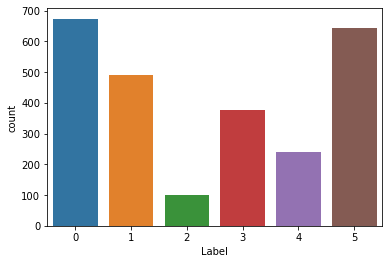

In [9]:
# the numbers of label in training data (whole)
sns.countplot(x=y_train['Label'])

In [10]:
valid_data = pd.read_csv('train(vaild_label).csv')
valid_data.head()
# valid=1 validing data , valid=0, training data

,Unnamed: 0,ID,Label,valid
0,0,train_00000.png,0,0
1,1,train_00001.png,1,1
2,2,train_00002.png,1,0
3,3,train_00003.png,5,0
4,4,train_00004.png,5,0


In [11]:
train_pd = valid_data[(valid_data['valid']==0)]
valid_pd = valid_data[(valid_data['valid']==1)]

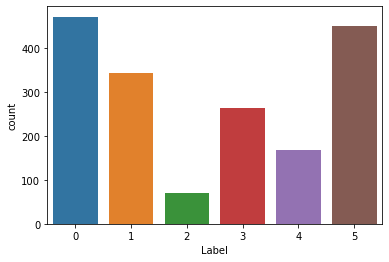

In [12]:
# the numbers of label in training data (training data in validation)
sns.countplot(x=train_pd['Label'])

In [13]:
# the numbers of label in training data (training data in validation)
unique, counts = np.unique(train_pd['Label'].values, return_counts=True)
print("unique ", unique)
print("counts: ", counts)

unique  [0 1 2 3 4 5]
counts:  [471 344  70 264 168 450]


In [14]:
train_pd = train_pd.drop('Unnamed: 0', axis=1)
train_pd = train_pd.drop('valid', axis=1)

valid_pd = valid_pd.drop('Unnamed: 0', axis=1)
valid_pd = valid_pd.drop('valid', axis=1)

In [15]:
#adjust weight
from sklearn.utils.class_weight import compute_class_weight
class_weights = compute_class_weight(class_weight='balanced', classes=unique, y=train_pd['Label'].values)
print(class_weights)

[0.62526539 0.85610465 4.20714286 1.1155303  1.75297619 0.65444444]


In [32]:
os.chdir('C:/Users/Meeting/2021 BIG DATA ANALYSIS/Final_Project_AOI/aoi/train_images') 
# train_image_path = os.path.join(path, 'train_image/')
# img = cv2.imread(os.path.join(train_image_path, train_pd.loc[0, "ID"]))
img = cv2.imread(train_pd.loc[0, "ID"])

In [33]:
img

array([[[171, 171, 171],
        [154, 154, 154],
        [153, 153, 153],
        ...,
        [189, 189, 189],
        [148, 148, 148],
        [158, 158, 158]],

       [[165, 165, 165],
        [136, 136, 136],
        [178, 178, 178],
        ...,
        [185, 185, 185],
        [185, 185, 185],
        [202, 202, 202]],

       [[160, 160, 160],
        [153, 153, 153],
        [171, 171, 171],
        ...,
        [162, 162, 162],
        [169, 169, 169],
        [170, 170, 170]],

       ...,

       [[184, 184, 184],
        [160, 160, 160],
        [201, 201, 201],
        ...,
        [165, 165, 165],
        [193, 193, 193],
        [169, 169, 169]],

       [[163, 163, 163],
        [168, 168, 168],
        [186, 186, 186],
        ...,
        [167, 167, 167],
        [178, 178, 178],
        [194, 194, 194]],

       [[172, 172, 172],
        [186, 186, 186],
        [154, 154, 154],
        ...,
        [148, 148, 148],
        [155, 155, 155],
        [187, 187, 187]]

image shape: (512, 512, 3)
data type: uint8
min: 109, max: 255


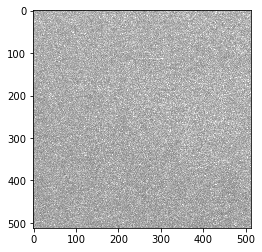

In [34]:
print(f"image shape: {img.shape}")
print(f"data type: {img.dtype}")
print(f"min: {img.min()}, max: {img.max()}")
plt.imshow(img)
plt.show()

In [35]:
train_pd.reset_index(drop=True, inplace=True)
valid_pd.reset_index(drop=True, inplace=True)

In [37]:
x_train = []
for i in range(len(train_pd.loc[:,'ID'])):
    image_data = cv2.imread(train_pd["ID"][i])
    new_image_data = cv2.resize(image_data, dsize=(512, 512))
    x_train.append(new_image_data)
x_train = np.array(x_train).reshape(-1,512,512,3)

In [38]:
print(np.array(x_train).shape)

(1767, 512, 512, 3)


In [39]:
x_valid = []
for i in range(len(valid_pd.loc[:,'ID'])):
    image_data = cv2.imread(valid_pd["ID"][i])
    new_image_data = cv2.resize(image_data, dsize=(512, 512))
    x_valid.append(new_image_data)
x_valid = np.array(x_valid).reshape(-1,512,512,3)

In [40]:
print(np.array(x_valid).shape)

(761, 512, 512, 3)


In [41]:
y_train = list(train_pd['Label'])
y_valid = list(valid_pd['Label'])

# CNN (validation)

In [42]:
import keras
from keras.models import Sequential
from keras.layers import Dense, SpatialDropout2D, Dropout, Flatten
from keras.layers import Conv2D, MaxPooling2D
from tensorflow.keras.optimizers import RMSprop
from keras.callbacks import EarlyStopping


import tensorflow.compat.v1 as tf
tf.disable_v2_behavior()
from tensorflow.keras.layers import Conv2D, MaxPool2D, Flatten, Dense
from tensorflow.keras.layers import Dropout, Input, BatchNormalization
from sklearn.metrics import confusion_matrix, accuracy_score
from tensorflow.keras.losses import categorical_crossentropy
from tensorflow.keras.optimizers import Adadelta
from matplotlib.pyplot import cm
from tensorflow.keras.models import Model

Instructions for updating:
non-resource variables are not supported in the long term


In [43]:
##CNN架構

## input layer
input_layer = Input((512, 512, 3))

## convolutional layers
conv_layer1 = Conv2D(filters=8, kernel_size=(3, 3), activation='relu')(input_layer)
## add max pooling to obtain the most imformatic features
pooling_layer1 = MaxPool2D(pool_size=(2, 2))(conv_layer1)

conv_layer2 = Conv2D(filters=16, kernel_size=(3, 3), activation='relu')(pooling_layer1)
pooling_layer2 = MaxPool2D(pool_size=(2, 2))(conv_layer2)

conv_layer3 = Conv2D(filters=32, kernel_size=(3, 3), activation='relu')(pooling_layer2)
pooling_layer3 = MaxPool2D(pool_size=(2, 2))(conv_layer3)

## perform batch normalization on the convolution outputs before feeding it to MLP architecture
pooling_layer4 = BatchNormalization()(pooling_layer3)
flatten_layer = Flatten()(pooling_layer4)

## create an MLP architecture with dense layers : 4096 -> 512 -> 10
## add dropouts to avoid overfitting / perform regularization
dense_layer1 = Dense(units=512, activation='relu')(flatten_layer)
dense_layer1 = Dropout(0.4)(dense_layer1)
output_layer = Dense(units=6, activation='softmax')(dense_layer1)

## define the model with input layer and output layer
model = Model(inputs=input_layer, outputs=output_layer)
model.summary()

Instructions for updating:
Colocations handled automatically by placer.
Model: "model"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 512, 512, 3)]     0         
_________________________________________________________________
conv2d (Conv2D)              (None, 510, 510, 8)       224       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 255, 255, 8)       0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 253, 253, 16)      1168      
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 126, 126, 16)      0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 124, 124, 32)      4640      
_______________________________________________________

In [44]:
adam = tf.keras.optimizers.Adam(lr=1e-8)
model.compile(loss='sparse_categorical_crossentropy',
          optimizer= "adam",
          metrics=['acc'])

c:\users\meeting\appdata\local\programs\python\python36\lib\site-packages\keras\optimizer_v2\optimizer_v2.py:356: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  "The `lr` argument is deprecated, use `learning_rate` instead.")


In [45]:
## CNN model fitting
history = model.fit(x=x_train, y=y_train, batch_size=32, epochs=50, validation_split=0.2)

Train on 1413 samples, validate on 354 samples
Epoch 1/50


ERROR:root:Internal Python error in the inspect module.
Below is the traceback from this internal error.



Traceback (most recent call last):
  File "c:\users\meeting\appdata\local\programs\python\python36\lib\site-packages\IPython\core\interactiveshell.py", line 3326, in run_code
    exec(code_obj, self.user_global_ns, self.user_ns)
  File "<ipython-input-45-dee45ea181a5>", line 2, in <module>
    history = model.fit(x=x_train, y=y_train, batch_size=32, epochs=50, validation_split=0.2)
  File "c:\users\meeting\appdata\local\programs\python\python36\lib\site-packages\keras\engine\training_v1.py", line 796, in fit
    use_multiprocessing=use_multiprocessing)
  File "c:\users\meeting\appdata\local\programs\python\python36\lib\site-packages\keras\engine\training_arrays_v1.py", line 657, in fit
    steps_name='steps_per_epoch')
  File "c:\users\meeting\appdata\local\programs\python\python36\lib\site-packages\keras\engine\training_arrays_v1.py", line 376, in model_iteration
    batch_outs = f(ins_batch)
  File "c:\users\meeting\appdata\local\programs\python\python36\lib\site-packages\keras\backe

KeyboardInterrupt: 

## Haralick Feature Extraction

In [62]:
train_hara = np.zeros((1767, 169))
for i in range(1767):
    image_data = cv2.imread(train_pd["ID"][i])
    hara = mahotas.features.haralick(image_data).flatten()
    train_hara[i] = hara


valid_hara = np.zeros((761, 169))
for i in range(761):
    image_data = cv2.imread(valid_pd["ID"][i])
    hara = mahotas.features.haralick(image_data).flatten()
    valid_hara[i] = hara

## Modeling (without weighted)

- Random Forest

In [71]:
from sklearn import ensemble, preprocessing, metrics
from sklearn.ensemble import RandomForestClassifier

RF = RandomForestClassifier(random_state=0)
RF.fit(train_hara, y_train)
RF_predicted = RF.predict(valid_hara)
RF_accuracy = metrics.accuracy_score(y_valid, RF_predicted)
print('Accuracy', RF_accuracy)

0.9461235216819974


In [87]:
pos_prob_RF  = RF.predict_proba(valid_hara)[:,1]

- XGboost

In [84]:
from xgboost import XGBClassifier
XGB = XGBClassifier(n_estimators=100, learning_rate= 0.3)
XGB.fit(train_hara, y_train)
XGB_predicted = XGB.predict(valid_hara)
print('訓練集: ',XGB.score(train_hara,y_train))
print('測試集: ',XGB.score(valid_hara,y_valid))

XGB_accuracy = metrics.accuracy_score(y_valid, XGB_predicted)
print('Accuracy', XGB_accuracy)

訓練集:  1.0
測試集:  0.9461235216819974
0.9461235216819974


In [85]:
pos_prob_XGB  = XGB.predict_proba(valid_hara)[:,1]

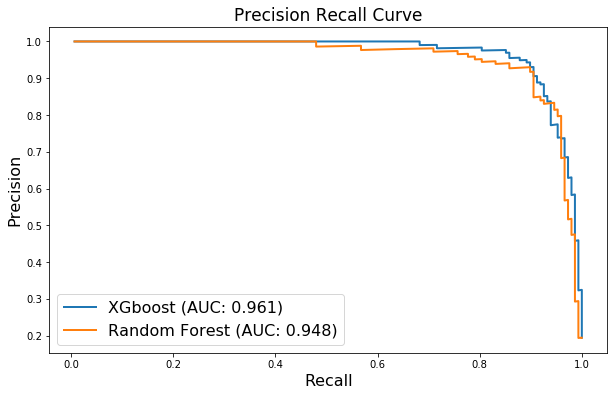

In [88]:
def get_pr(pos_prob,y_true):
    pos = y_true[y_true==1]
    threshold = np.sort(pos_prob)[::-1]
    y = y_true[pos_prob.argsort()[::-1]]
    recall = [] ; precision = []
    tp = 0 ; fp = 0
    auc = 0
    for i in range(len(threshold)):
        if y[i] == 1:
            tp += 1
            recall.append(tp/len(pos))
            precision.append(tp/(tp+fp))
            auc += (recall[i]-recall[i-1])*precision[i]
        else:
            fp += 1
            recall.append(tp/len(pos))
            precision.append(tp/(tp+fp))
    return precision,recall,auc

precision_XGB,recall_XGB,auc_XGB = get_pr(pos_prob_XGB,np.array(y_valid))
precision_RF,recall_RF,auc_RF = get_pr(pos_prob_RF,np.array(y_valid))

plt.figure(figsize=(10,6))
plt.plot(recall_XGB,precision_XGB,label="XGboost (AUC: {:.3f})".format(auc_XGB),linewidth=2)
plt.plot(recall_RF,precision_RF,label="Random Forest (AUC: {:.3f})".format(auc_RF),linewidth=2)
plt.xlabel("Recall",fontsize=16)
plt.ylabel("Precision",fontsize=16)
plt.title("Precision Recall Curve",fontsize=17)
plt.legend(fontsize=16)

## Modeling (with weighted)

- Random Forest

In [90]:
class_weights

array([0.62526539, 0.85610465, 4.20714286, 1.1155303 , 1.75297619,
       0.65444444])

In [100]:
from sklearn import ensemble, preprocessing, metrics
from sklearn.ensemble import RandomForestClassifier

RF_weighted = RandomForestClassifier(random_state=0, 
                class_weight={0:0.62526539, 1:0.85610465, 2:4.20714286, 3:1.1155303 , 4:1.75297619, 5:0.65444444})
RF_weighted.fit(train_hara, y_train)
RF_weighted_predicted = RF_weighted.predict(valid_hara)
RF_weighted_accuracy = metrics.accuracy_score(y_valid, RF_weighted_predicted)
print('Accuracy:', RF_weighted_accuracy)

Accuracy: 0.9448094612352168


In [101]:
pos_prob_RF_weighted  = RF_weighted.predict_proba(valid_hara)[:,1]

- XGboost

In [95]:
from xgboost import XGBClassifier
from sklearn.utils.class_weight import compute_sample_weight
sample_weights = compute_sample_weight(
    class_weight='balanced',
    y=y_train #provide your own target name
)

XGB_weighted = XGBClassifier(n_estimators=100, learning_rate= 0.3)
XGB_weighted.fit(train_hara, y_train, sample_weight=sample_weights)
XGB_weighted_predicted = XGB_weighted.predict(valid_hara)
print('訓練集: ',XGB_weighted.score(train_hara,y_train))
print('測試集: ',XGB_weighted.score(valid_hara,y_valid))

XGB_weighted_accuracy = metrics.accuracy_score(y_valid, XGB_weighted_predicted)
print('Accuracy', XGB_weighted_accuracy)

訓練集:  1.0
測試集:  0.9487516425755584
Accuracy 0.9487516425755584


In [96]:
pos_prob_XGB_weighted  = XGB_weighted.predict_proba(valid_hara)[:,1]

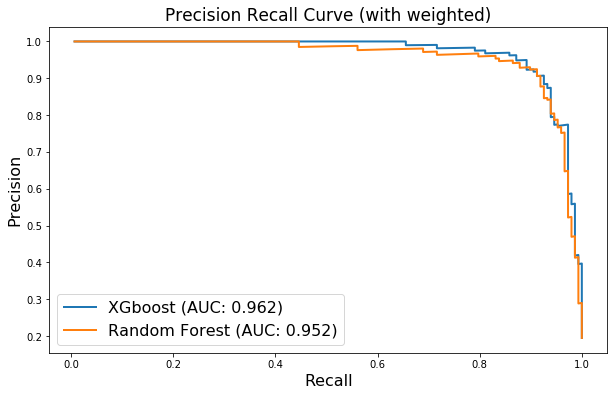

In [102]:
precision_XGB,recall_XGB,auc_XGB = get_pr(pos_prob_XGB_weighted,np.array(y_valid))
precision_RF,recall_RF,auc_RF = get_pr(pos_prob_RF_weighted,np.array(y_valid))

plt.figure(figsize=(10,6))
plt.plot(recall_XGB,precision_XGB,label="XGboost (AUC: {:.3f})".format(auc_XGB),linewidth=2)
plt.plot(recall_RF,precision_RF,label="Random Forest (AUC: {:.3f})".format(auc_RF),linewidth=2)
plt.xlabel("Recall",fontsize=16)
plt.ylabel("Precision",fontsize=16)
plt.title("Precision Recall Curve (with weighted)",fontsize=17)
plt.legend(fontsize=16)

In [122]:
RF_cm = confusion_matrix(y_valid, RF_weighted_predicted)
XGB_cm = confusion_matrix(y_valid, XGB_weighted_predicted)

print("RF\n", RF_cm)
print("XGB\n", XGB_cm)

RF
 [[198   0   1   4   0   0]
 [  4 131   0   4   4   5]
 [  1   0  29   0   0   0]
 [  6   7   0  99   2   0]
 [  0   1   0   2  69   0]
 [  0   1   0   0   0 193]]
XGB
 [[198   0   1   4   0   0]
 [  3 132   0   5   3   5]
 [  2   0  28   0   0   0]
 [  2   6   0 102   4   0]
 [  0   2   0   1  69   0]
 [  0   1   0   0   0 193]]
